In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

# plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
# plt.rc('font', family='NanumGothic') # For Windows

In [4]:
import FinanceDataReader as fdr

#삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung = fdr.DataReader('005930')

In [5]:
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-04,1702,1712,1663,1702,363810,NaN
1999-02-05,1692,1761,1653,1761,695955,0.034665
1999-02-08,1680,1751,1680,1702,380690,-0.033504
1999-02-09,1682,1698,1657,1675,381820,-0.015864
1999-02-10,1653,1675,1604,1634,664282,-0.024478


In [6]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-05-16,65800,65900,65300,65400,12334657,0.013953
2023-05-17,65900,65900,64800,65000,10745504,-0.006116
2023-05-18,66000,66200,65700,66200,14431704,0.018462
2023-05-19,67800,68400,67500,68400,20349345,0.033233
2023-05-22,68400,68900,68000,68800,6708188,0.005848


In [7]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 1999-02-04 to 2023-05-22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   int64  
 1   High    6000 non-null   int64  
 2   Low     6000 non-null   int64  
 3   Close   6000 non-null   int64  
 4   Volume  6000 non-null   int64  
 5   Change  5999 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 328.1 KB


In [8]:
samsung.describe()

,Open,High,Low,Close,Volume,Change
count,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,5999.000000
mean,25821.049500,26081.360833,25552.892333,25840.431500,3.647546e+06,0.000881
std,21096.283488,21265.140329,20913.592636,21079.761003,7.193630e+06,0.023022
min,0.000000,0.000000,0.000000,1595.000000,0.000000e+00,-0.137566
25%,9870.000000,9990.000000,9780.000000,9897.500000,2.940012e+05,-0.011306
50%,17230.000000,17430.000000,17020.000000,17250.000000,4.968370e+05,0.000000
75%,40375.000000,40700.000000,40024.750000,40500.000000,1.131541e+06,0.012139
max,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.150000


In [9]:
samsung.index

DatetimeIndex(['1999-02-04', '1999-02-05', '1999-02-08', '1999-02-09',
               '1999-02-10', '1999-02-11', '1999-02-12', '1999-02-18',
               '1999-02-19', '1999-02-22',
               ...
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18',
               '2023-05-19', '2023-05-22'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [10]:
samsung['Year'] = samsung.index.year
samsung['Month'] = samsung.index.month
samsung['Day'] = samsung.index.day

In [11]:
samsung.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1999-02-04,1702,1712,1663,1702,363810,NaN,1999,2,4
1999-02-05,1692,1761,1653,1761,695955,0.034665,1999,2,5
1999-02-08,1680,1751,1680,1702,380690,-0.033504,1999,2,8
1999-02-09,1682,1698,1657,1675,381820,-0.015864,1999,2,9
1999-02-10,1653,1675,1604,1634,664282,-0.024478,1999,2,10


Text(0, 0.5, 'price')

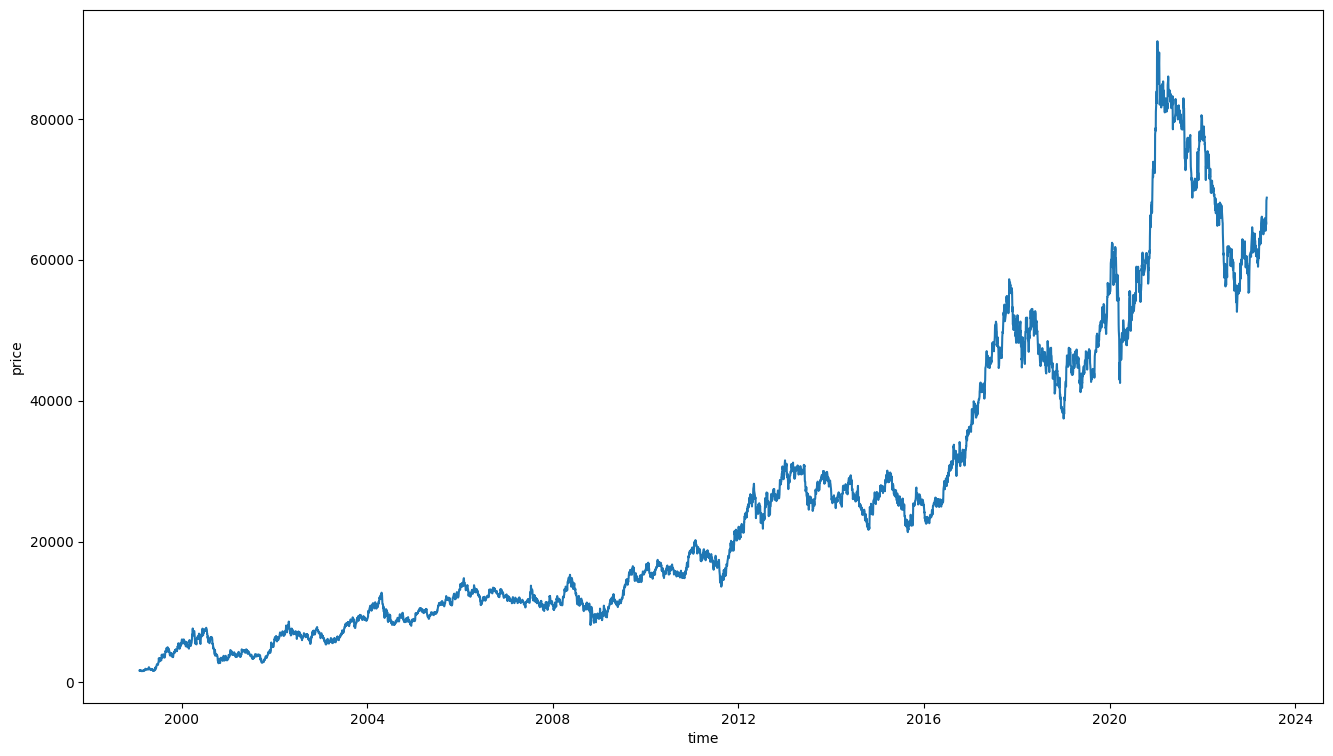

In [12]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=samsung['Close'], x=samsung.index)
plt.xlabel('time')
plt.ylabel('price')

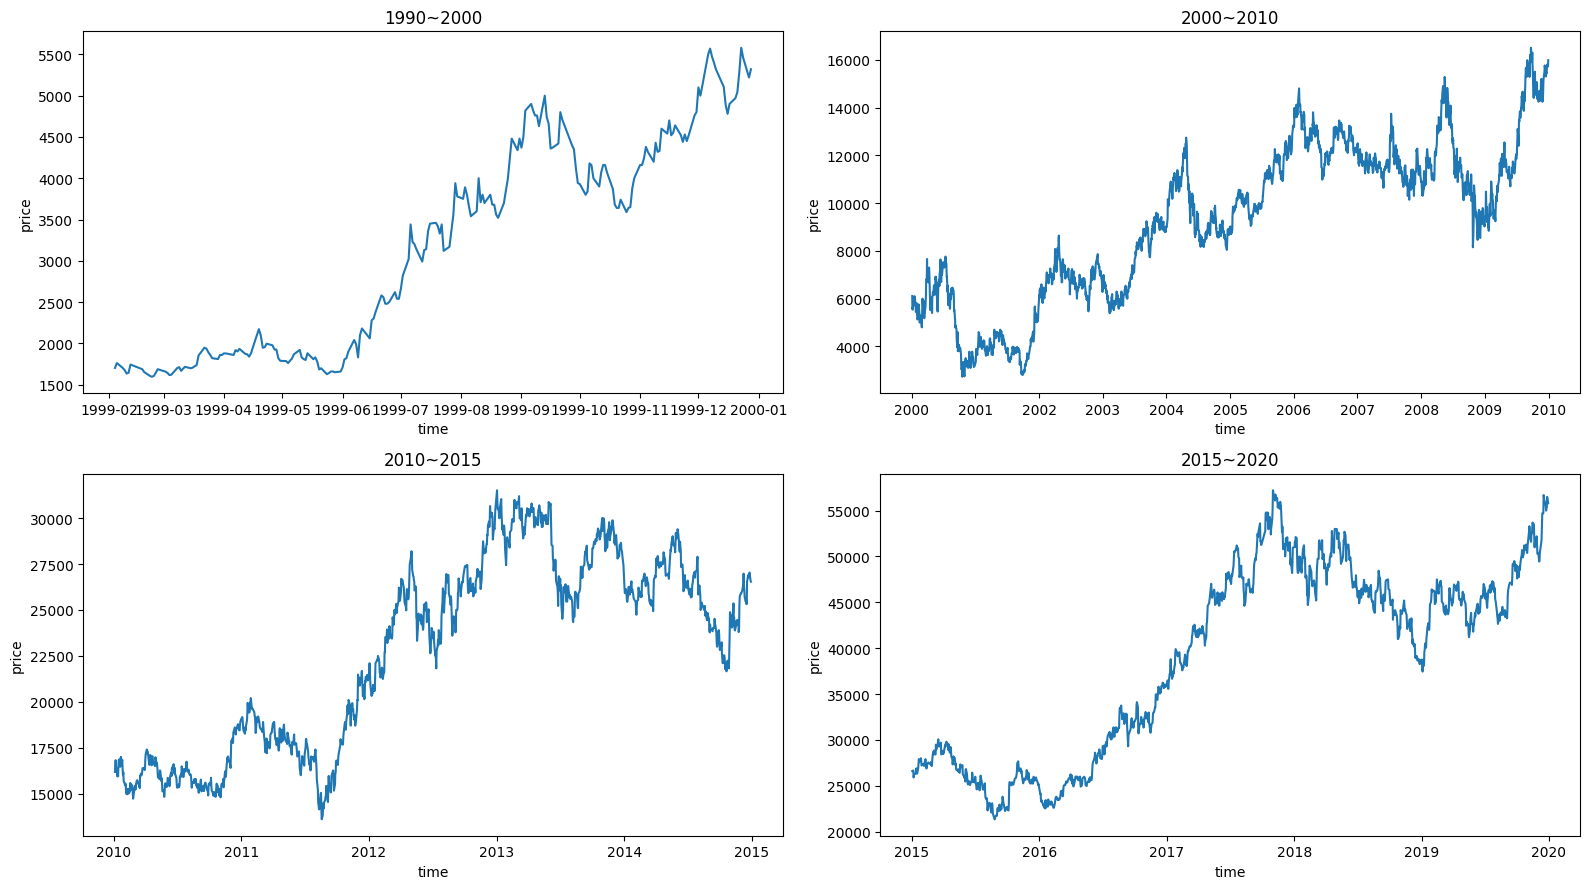

In [13]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = samsung.loc[(samsung.index > time_steps[i][0]) & (samsung.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(samsung[scale_cols])
scaled

array([[0.01884828, 0.01768595, 0.01858101, 0.0011968 , 0.00402863],
       [0.01873754, 0.01819215, 0.01846927, 0.00185672, 0.00770662],
       [0.01860465, 0.01808884, 0.01877095, 0.0011968 , 0.00421555],
       ...,
       [0.73089701, 0.6838843 , 0.73407821, 0.72261059, 0.1598086 ],
       [0.75083056, 0.70661157, 0.75418994, 0.74721772, 0.22533724],
       [0.75747508, 0.71177686, 0.75977654, 0.75169174, 0.07428271]])

In [15]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [18]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [19]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [20]:
x_train

,Open,High,Low,Volume
0,0.018848,0.017686,0.018581,0.004029
1,0.018738,0.018192,0.018469,0.007707
2,0.018605,0.018089,0.018771,0.004216
3,0.018627,0.017541,0.018514,0.004228
4,0.018306,0.017304,0.017922,0.007356
...,...,...,...,...
4795,0.517165,0.486054,0.514525,0.097189
4796,0.510520,0.480888,0.509497,0.077955
4797,0.503876,0.473657,0.498883,0.197591
4798,0.503876,0.476240,0.505028,0.128479


In [21]:
import tensorflow as tf

In [22]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [23]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [24]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [25]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [27]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [28]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [29]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
# filename = os.path.join('./model', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint('model1.ckpt', 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [30]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    147/Unknown - 2s 4ms/step - loss: 1.5681e-04 - mse: 3.1362e-04
Epoch 1: val_loss improved from inf to 0.00126, saving model to model1.ckpt
150/150 [==============================] - 3s 10ms/step - loss: 1.5554e-04 - mse: 3.1108e-04 - val_loss: 0.0013 - val_mse: 0.0025
Epoch 2/50
145/150 [============================>.] - ETA: 0s - loss: 3.4109e-05 - mse: 6.8218e-05
Epoch 2: val_loss did not improve from 0.00126
150/150 [==============================] - 1s 4ms/step - loss: 3.6948e-05 - mse: 7.3896e-05 - val_loss: 0.0014 - val_mse: 0.0029
Epoch 3/50
146/150 [============================>.] - ETA: 0s - loss: 3.6627e-05 - mse: 7.3255e-05
Epoch 3: val_loss improved from 0.00126 to 0.00071, saving model to model1.ckpt
150/150 [==============================] - 1s 5ms/step - loss: 3.7722e-05 - mse: 7.5445e-05 - val_loss: 7.1032e-04 - val_mse: 0.0014
Epoch 4/50
140/150 [===========================>..] - ETA: 0s - loss: 3.1707e-05 - mse: 6.3414e-05
Epoch 4: val_loss improved fro

In [31]:
# model.load_weights(model1.ckpt)

In [32]:
df

,Open,High,Low,Close,Volume
0,0.018848,0.017686,0.018581,0.001197,0.004029
1,0.018738,0.018192,0.018469,0.001857,0.007707
2,0.018605,0.018089,0.018771,0.001197,0.004216
3,0.018627,0.017541,0.018514,0.000895,0.004228
4,0.018306,0.017304,0.017922,0.000436,0.007356
...,...,...,...,...,...
5995,0.728682,0.680785,0.729609,0.713663,0.136587
5996,0.729790,0.680785,0.724022,0.709189,0.118990
5997,0.730897,0.683884,0.734078,0.722611,0.159809
5998,0.750831,0.706612,0.754190,0.747218,0.225337


In [55]:
import FinanceDataReader as fdr

#삼성전자(005930) 전체 (1996-11-05 ~ 현재)
df = fdr.DataReader('005930')

In [56]:


# # 데이터 가져오기
# # df = pd.read_csv('stock_data.csv')

# 종가 데이터만 가져오기
close_prices = df['Close'].values

# # 훈련 데이터와 테스트 데이터 분리
split_ratio = 0.8
train_size = int(len(close_prices) * split_ratio)
test_size = len(close_prices) - train_size

train_prices = close_prices[:train_size]
test_prices = close_prices[train_size:]

# # 모델 생성
model = Sequential()
model.add(LSTM(100, input_shape=(1, 1)))
model.add(Dense(1))



In [48]:
# train_prices = train_prices.reshape(-1, 1)

In [57]:
train_prices

array([ 1702,  1761,  1702, ..., 44900, 45600, 46300], dtype=int64)

In [58]:
# # 모델 훈련
model.compile(loss='mse', optimizer='adam')
model.fit(train_prices, epochs=100)



Epoch 1/100


ValueError: in user code:

    File "C:\Users\Use 1\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Use 1\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Use 1\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Use 1\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Use 1\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Use 1\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_4' (type Sequential).
    
    Input 0 of layer "lstm_4" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (32,)
    
    Call arguments received by layer 'sequential_4' (type Sequential):
      • inputs=tf.Tensor(shape=(32,), dtype=int64)
      • training=True
      • mask=None


In [ ]:
# # 모델 평가
# pred_prices = model.predict(test_prices)

# # 결과 그래프 그리기
# plt.plot(train_prices, label='train prices')
# plt.plot(test_prices, label='test prices')
# plt.plot(pred_prices, label='predicted prices')
# plt.legend()
# plt.show()
